# 1.导论

什么是机器学习？机器学习的一个重要的目标就是利用数学模型来理解数据，发现数据中的规律，用作数据的分析和预测。数据通常由一组向量组成，这组向量中的每个向量都是一个样本，我们用$x_i$来表示一个样本，其中$i=1,2,3,...,N$,共N个样本，每个样本$x_i=(x_{i1},x_{i2},...,x_{ip},y_i)$共p+1个维度，前p个维度的每个维度我们称为一个特征，最后一个维度$y_i$我们称为因变量(响应变量)。特征用来描述影响因变量的因素，如：我们要探寻身高是否会影响体重的关系的时候，身高就是一个特征，体重就是一个因变量。通常在一个数据表dataframe里面，一行表示一个样本$x_i$，一列表示一个特征。      
根据数据是否有因变量，机器学习的任务可分为：**有监督学习**和**无监督学习**。
   - 有监督学习：给定某些特征去估计因变量，即因变量存在的时候，我们称这个机器学习任务为有监督学习。如：我们使用房间面积，房屋所在地区，环境等级等因素去预测某个地区的房价。          
   - 无监督学习：给定某些特征但不给定因变量，建模的目的是学习数据本身的结构和关系。如：我们给定某电商用户的基本信息和消费记录，通过观察数据中的哪些类型的用户彼此间的行为和属性类似，形成一个客群。注意，我们本身并不知道哪个用户属于哪个客群，即没有给定因变量。      

![jupyter](./1.1.png)        

根据因变量的是否连续，有监督学习又分为**回归**和**分类**：
   - 回归：因变量是连续型变量，如：房价，体重等。
   - 分类：因变量是离散型变量，如：是否患癌症，西瓜是好瓜还是坏瓜等。

为了更好地叙述后面的内容，我们对数据的形式作出如下约定：      
第i个样本：$x_i=(x_{i1},x_{i2},...,x_{ip},y_i)^T,i=1,2,...,N$     
因变量$y=(y_1,y_2,...,y_N)^T$        
第k个特征:$x^{(k)}=(x_{1k},x_{2k},...,x_{Nk})^T$     
特征矩阵$X=(x_1,x_2,...,x_N)^T$

在学习机器学习中，我们经常使用scikit-learn简称sklearn工具库来探索机器学习项目，下面我们开始使用sklearn来演示这几个具体的概念：

In [1]:
# 引入相关科学计算包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use("ggplot")      
import seaborn as sns

## 1.1 回归

首先，我们先来看看有监督学习中回归的例子，我们使用sklearn内置数据集Boston房价数据集。sklearn中所有内置数据集都封装在datasets对象内：
返回的对象有：
   - data:特征X的矩阵(ndarray)
   - target:因变量的向量(ndarray)
   - feature_names:特征名称(ndarray)

In [2]:
from sklearn import datasets
boston = datasets.load_boston()     # 返回一个类似于字典的类
X = boston.data
y = boston.target
features = boston.feature_names
boston_data = pd.DataFrame(X,columns=features)
boston_data["Price"] = y
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


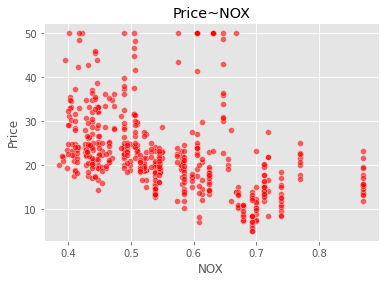

In [4]:
sns.scatterplot(x=boston_data['NOX'],y=boston_data['Price'],color="r",alpha=0.6)
plt.title("Price~NOX")
plt.show()

我们可以看到，数据给定任务所需要的因变量，因变量为波士顿房价Price是一个连续型变量，所以这是一个回归的例子。

各个特征的相关解释：
   - CRIM：各城镇的人均犯罪率
   - ZN：规划地段超过25,000平方英尺的住宅用地比例
   - INDUS：城镇非零售商业用地比例
   - CHAS：是否在查尔斯河边(=1是)
   - NOX：一氧化氮浓度(/千万分之一)
   - RM：每个住宅的平均房间数
   - AGE：1940年以前建造的自住房屋的比例
   - DIS：到波士顿五个就业中心的加权距离
   - RAD：放射状公路的可达性指数
   - TAX：全部价值的房产税率(每1万美元)
   - PTRATIO：按城镇分配的学生与教师比例
   - B：1000(Bk - 0.63)^2其中Bk是每个城镇的黑人比例
   - LSTAT：较低地位人口
   - Price：房价

# 1.2 分类

我们来看看一个分类的例子，我们来看看大名鼎鼎的iris数据集：

In [5]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
features = iris.feature_names
iris_data = pd.DataFrame(X,columns=features)
iris_data['target'] = y
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


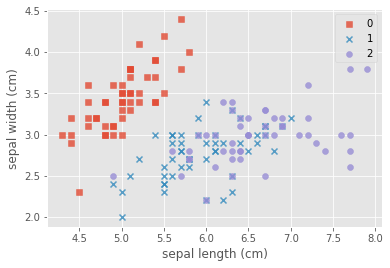

In [6]:
# 可视化特征
marker = ['s','x','o']
for index,c in enumerate(np.unique(y)):
    plt.scatter(x=iris_data.loc[y==c,"sepal length (cm)"],y=iris_data.loc[y==c,"sepal width (cm)"],alpha=0.8,label=c,marker=marker[c])
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.legend()
plt.show()

我们可以看到：每种不同的颜色和点的样式为一种类型的鸢尾花，数据集有三种不同类型的鸢尾花。因此因变量是一个类别变量，因此通过特征预测鸢尾花类别的问题是一个分类问题。

各个特征的相关解释：
   - sepal length (cm)：花萼长度(厘米)
   - sepal width (cm)：花萼宽度(厘米)
   - petal length (cm)：花瓣长度(厘米)
   - petal width (cm)：花瓣宽度(厘米)

## 1.3 无监督学习

我们可以使用sklearn生成符合自身需求的数据集，下面我们用其中几个函数例子来生成无因变量的数据集：   
https://scikit-learn.org/stable/modules/classes.html?highlight=datasets#module-sklearn.datasets    
![jupyter](./1.2.png)

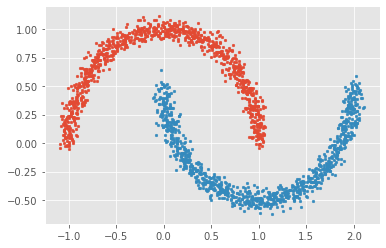

In [7]:
# 生成月牙型非凸集
from sklearn import datasets
x, y = datasets.make_moons(n_samples=2000, shuffle=True,
                  noise=0.05, random_state=None)
for index,c in enumerate(np.unique(y)):
    plt.scatter(x[y==c,0],x[y==c,1],s=7)
plt.show()

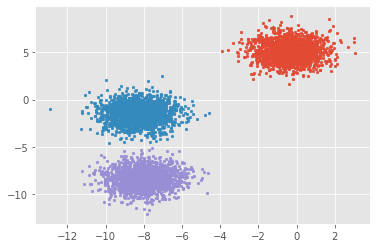

In [8]:
# 生成符合正态分布的聚类数据
from sklearn import datasets
x, y = datasets.make_blobs(n_samples=5000, n_features=2, centers=3)
for index,c in enumerate(np.unique(y)):
    plt.scatter(x[y==c, 0], x[y==c, 1],s=7)
plt.show()

**在本开源项目的章节中，我们要重点介绍回归和分类的集成学习的问题，因此我们在接下来的章节中不再介绍关于无监督学习的具体算法，后面的内容仅仅涉及回归和分类问题。**